## Examen de cinturón AML – Opción A

**Descripción del examen:**

En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

**Dataset:**

El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.
Enlace al dataset: [Customer Personality Analysis](https://www.kaggle.com/imakash3011/customer-personality-analysis) 



**"En este trabajo, analizaremos un dataset proporcionado por el Dr. Omar Romero-Hernandez, que contiene información sobre clientes de una empresa con el objetivo de realizar un Análisis de la Personalidad del Cliente.**

**Este análisis nos permitirá identificar diferentes segmentos de clientes basándonos en sus características demográficas, comportamiento de compra e interacción con la empresa.**

**Mediante técnicas de clustering, buscaremos agrupar a los clientes en segmentos significativos que permitan a la empresa optimizar sus estrategias de marketing y desarrollo de productos.**

**El dataset incluye información detallada sobre los clientes, sus compras en diferentes canales (online, catálogo y tienda física), su historial de compras y su respuesta a diferentes campañas promocionales.** 

**Este análisis nos permitirá obtener una comprensión más profunda del perfil de los clientes y su comportamiento, lo que resulta fundamental para la toma de decisiones estratégicas."**

### Instrucciones:


### 1. Exploración y preprocesamiento de datos:
  - Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
  - Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.


In [607]:
#importamos las librerias necesarias para la exploracion de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [608]:
#importamos el dataset
df = pd.read_csv('../data/marketing_campaign.csv', delimiter="\t")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [609]:
#pasar dt_customer a datetime en formato dd/mm/yyyy
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


In [610]:
#verificamos los valores nulos
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Income,2216,24,1.07
ID,2240,0,0.00
NumDealsPurchases,2240,0,0.00
Z_Revenue,2240,0,0.00
Z_CostContact,2240,0,0.00
Complain,2240,0,0.00
AcceptedCmp2,2240,0,0.00
AcceptedCmp1,2240,0,0.00
AcceptedCmp5,2240,0,0.00
AcceptedCmp4,2240,0,0.00


| Variable        | Descripción                                                                 | Tipo de Dato |
|-----------------|-----------------------------------------------------------------------------|-------------|
| `ID`            | Identificador único del cliente.                                           | Numérico    |
| `Year_Birth`    | Año de nacimiento del cliente.                                             | Numérico    |
| `Education`     | Nivel educativo del cliente (e.g., Graduado, Posgrado, etc.).                | Categórico  |
| `Marital_Status`| Estado civil del cliente (e.g., Soltero, Casado, Divorciado, etc.).        | Categórico  |
| `Income`        | Ingresos anuales del hogar del cliente.                                     | Numérico    |
| `Kidhome`       | Número de niños en el hogar del cliente.                                     | Numérico    |
| `Teenhome`      | Número de adolescentes en el hogar del cliente.                               | Numérico    |
| `Dt_Customer`   | Fecha de inscripción del cliente en la empresa (Formato fecha).              | Fecha       |
| `Recency`       | Número de días desde la última compra del cliente.                             | Numérico    |
| `Complain`      | 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario.        | Binario     |
| `MntWines`      | Cantidad gastada en vino en los últimos 2 años.                               | Numérico    |
| `MntFruits`     | Cantidad gastada en frutas en los últimos 2 años.                              | Numérico    |
| `MntMeatProducts`| Cantidad gastada en carne en los últimos 2 años.                               | Numérico    |
| `MntFishProducts`| Cantidad gastada en pescado en los últimos 2 años.                              | Numérico    |
| `MntSweetProducts`| Cantidad gastada en dulces en los últimos 2 años.                               | Numérico    |
| `MntGoldProds`  | Cantidad gastada en oro en los últimos 2 años.                                | Numérico    |
| `NumDealsPurchases`| Número de compras realizadas con descuento.                                | Numérico    |
| `AcceptedCmp1`  | 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario. | Binario     |
| `AcceptedCmp2`  | 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.| Binario     |
| `AcceptedCmp3`  | 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.| Binario     |
| `AcceptedCmp4`  | 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario. | Binario     |
| `AcceptedCmp5`  | 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.| Binario     |
| `Response`      | 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.    | Binario     |
| `NumWebPurchases`| Número de compras realizadas a través del sitio web de la empresa.         | Numérico    |
| `NumCatalogPurchases`| Número de compras realizadas mediante catálogo.                             | Numérico    |
| `NumStorePurchases`| Número de compras realizadas directamente en tiendas físicas.              | Numérico    |
| `NumWebVisitsMonth`| Número de visitas al sitio web de la empresa en el último mes.              | Numérico    |

In [611]:
# Creo una nueva Recency category para una mejor representacion de los datos
# Calcula los cuartiles de la variable Recency
cuartiles = df['Recency'].quantile([0.25, 0.5, 0.75])

# Función para asignar la categoría según el cuartil
def asignar_categoria_recency(recency):
    if recency <= cuartiles[0.25]:
        return 'recurrente'
    elif recency <= cuartiles[0.5]:
        return 'regular'
    elif recency <= cuartiles[0.75]:
        return 'poco_frecuente'
    else:
        return 'ocasional'

# Crea la nueva columna 'Recency_Category' aplicando la función
df['Recency_Category'] = df['Recency'].apply(asignar_categoria_recency).astype('category')

# Imprime la distribución de las nuevas categorías para verificar
print('Recency Category:')
print(df['Recency_Category'].value_counts())



#Para verificar los cuartiles
print(cuartiles)

#Para ver el minimo y el maximo de recency
print(f"El valor minimo es {df['Recency'].min()} y el valor maximo es {df['Recency'].max()}")


Recency Category:
poco_frecuente    567
recurrente        567
regular           555
ocasional         551
Name: Recency_Category, dtype: int64
0.25    24.0
0.50    49.0
0.75    74.0
Name: Recency, dtype: float64
El valor minimo es 0 y el valor maximo es 99


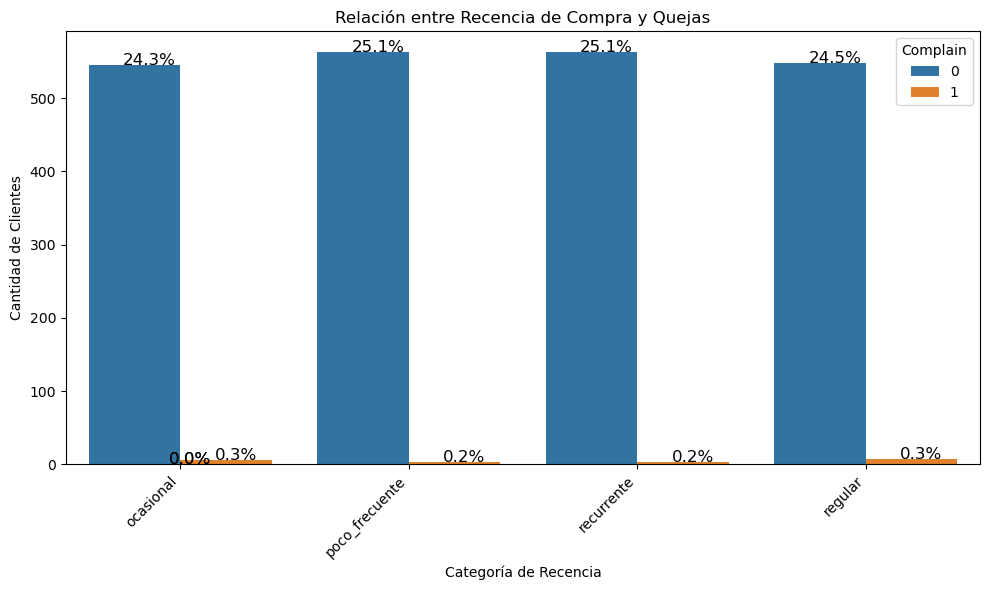

In [612]:
# Visualizamos como esta distribuida con relacion a la cantidad de quejas de los clientes
# Crear tabla de contingencia
contingency_table = pd.crosstab(df['Recency_Category'], df['Complain'], normalize='index') * 100 #Normalizar por fila para obtener porcentajes

# Visualizar tabla de contingencia para ver el porcentaje de quejas por categoría de recencia

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Recency_Category', hue='Complain', data=df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)
plt.title('Relación entre Recencia de Compra y Quejas')
plt.xlabel('Categoría de Recencia')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right') #Rotar los nombres del eje x para que se vean bien
plt.tight_layout()
plt.show()

### Aca podemos visualizar que las quejas no son representativas con la frecuencia con la que el cliente interactua con el negocio

In [613]:
#  Crear la variable 'Number_Campaigns_Accepted' para poder simplificar nuestro analisis
df['Number_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Crear la variable 'Accepted'
df['Accepted'] = (df['Number_Campaigns_Accepted'] > 0).astype(int)

#Verificar
print(df['Number_Campaigns_Accepted'].value_counts())
print(df['Accepted'].value_counts())


0    1631
1     370
2     142
3      51
4      36
5      10
Name: Number_Campaigns_Accepted, dtype: int64
0    1631
1     609
Name: Accepted, dtype: int64


In [614]:
#Revisar las tablas de contingencia
# Tabla de contingencia entre 'Number_Campaigns_Accepted' y las columnas originales
for i in range(1, 6):
    print(f"Tabla de contingencia entre Number_Campaigns_Accepted y AcceptedCmp{i}:")
    print(pd.crosstab(df['Number_Campaigns_Accepted'], df[f'AcceptedCmp{i}']))
print("Tabla de contingencia entre Number_Campaigns_Accepted y Response:")
print(pd.crosstab(df['Number_Campaigns_Accepted'], df['Response']))

#Tabla de contingencia entre accepted y las columnas originales
for i in range(1, 6):
    print(f"Tabla de contingencia entre Accepted y AcceptedCmp{i}:")
    print(pd.crosstab(df['Accepted'], df[f'AcceptedCmp{i}']))
print("Tabla de contingencia entre Accepted y Response:")
print(pd.crosstab(df['Accepted'], df['Response']))

Tabla de contingencia entre Number_Campaigns_Accepted y AcceptedCmp1:
AcceptedCmp1                  0   1
Number_Campaigns_Accepted          
0                          1631   0
1                           331  39
2                           111  31
3                            19  32
4                             4  32
5                             0  10
Tabla de contingencia entre Number_Campaigns_Accepted y AcceptedCmp2:
AcceptedCmp2                  0   1
Number_Campaigns_Accepted          
0                          1631   0
1                           370   0
2                           134   8
3                            46   5
4                            29   7
5                             0  10
Tabla de contingencia entre Number_Campaigns_Accepted y AcceptedCmp3:
AcceptedCmp3                  0   1
Number_Campaigns_Accepted          
0                          1631   0
1                           296  74
2                            78  64
3                            41  1

In [615]:
#Esteos codigos fueron copiados de un EDA del mismo dataset, no todas las nuevas variables del EDA fueron copiadas, este es el link https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/
# creamos una variable que sea el total de gasto
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

# renombramos para diferenciar si estan solos o en pareja
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

#creamos variables para la cantidad de hijos
df['Children']=df['Kidhome']+df['Teenhome']

# una variable para saber si tiene hijos o no
df['Has_child'] = np.where(df.Children> 0, 'Has child', 'No child')

#renombramos las variables de gasto
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

#renombramos la variable de educacion
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

#renombramos la variable de compras
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

# renombramos la variable Education
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})
# Creamo una nueva columna Age
max_year = df['Dt_Customer'].dt.year.max()
df['Age'] = max_year - df['Year_Birth']

# Display the first few rows to verify the new column
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Recency_Category,Number_Campaigns_Accepted,Accepted,Spending,Children,Has_child,Age
0,5524,1957,Postgraduate,Alone,58138.0,0,0,2012-09-04,58,635,...,3,11,1,poco_frecuente,1,1,1617,0,No child,57
1,2174,1954,Postgraduate,Alone,46344.0,1,1,2014-03-08,38,11,...,3,11,0,regular,0,0,27,2,Has child,60
2,4141,1965,Postgraduate,In couple,71613.0,0,0,2013-08-21,26,426,...,3,11,0,regular,0,0,776,0,No child,49
3,6182,1984,Postgraduate,In couple,26646.0,1,0,2014-02-10,26,11,...,3,11,0,regular,0,0,53,1,Has child,30
4,5324,1981,Postgraduate,In couple,58293.0,1,0,2014-01-19,94,173,...,3,11,0,ocasional,0,0,422,1,Has child,33


In [616]:
# vemos los datos estadisticos de las variables numericas
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Number_Campaigns_Accepted,Accepted,Spending,Children,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.013393,0.009375,3.0,11.0,0.149107,0.446875,0.271875,605.798214,0.950446,45.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.114976,0.096391,0.0,0.0,0.356274,0.890543,0.445025,602.249288,0.751803,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,5.000000,0.000000,18.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,68.750000,0.000000,37.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,3.0,11.0,0.000000,0.000000,0.000000,396.000000,1.000000,44.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1.000000,1045.500000,1.000000,55.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,1.000000,5.000000,1.000000,2525.000000,3.000000,121.000000


Variables categóricas:
Index(['Education', 'Marital_Status', 'Recency_Category', 'Has_child'], dtype='object')


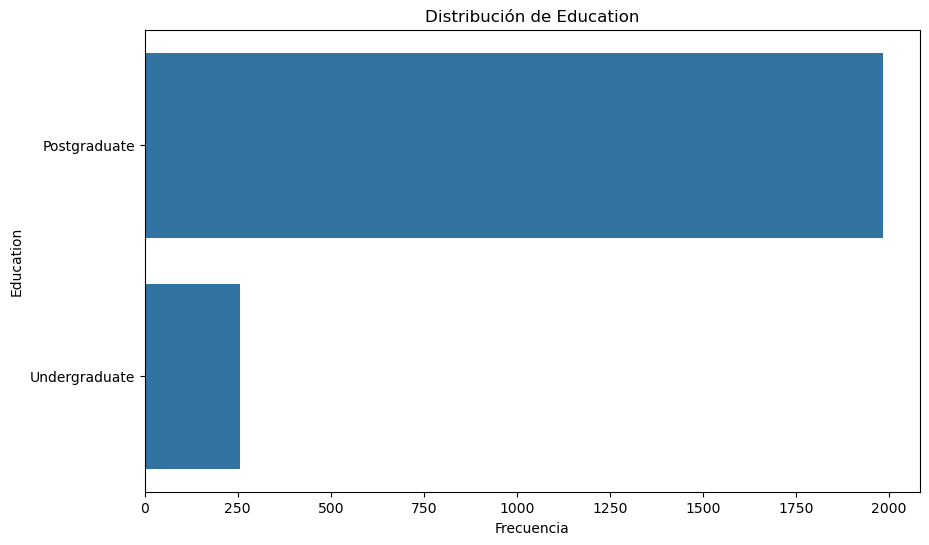

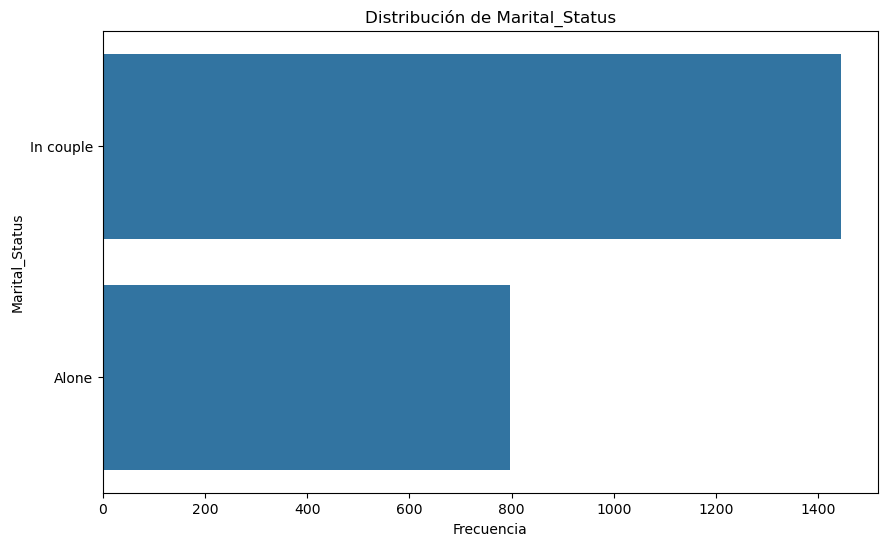

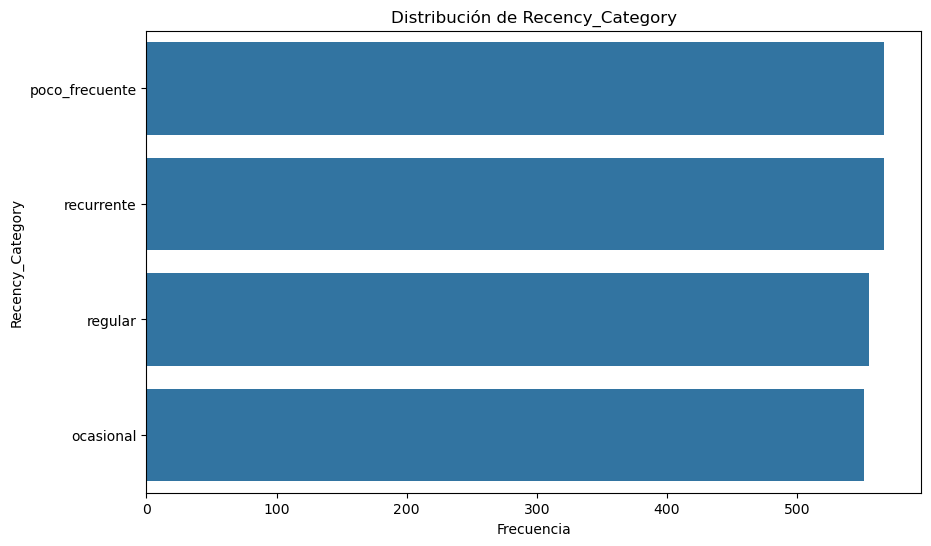

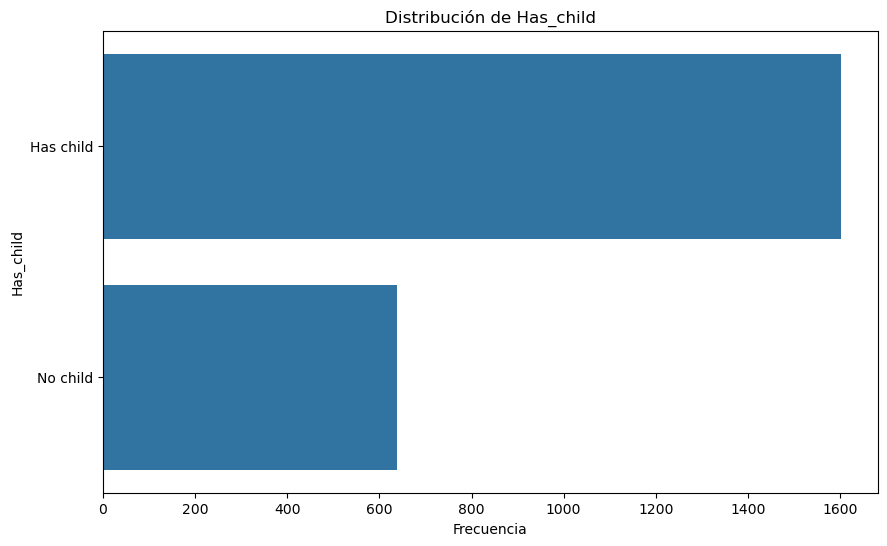

In [617]:
# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Visualizar las variables categóricas
print("Variables categóricas:")
print(categorical_columns)

# Mostrar las primeras filas de las variables categóricas
df[categorical_columns].head()
# Visualizar las variables categóricas en gráficos de columnas
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.show()

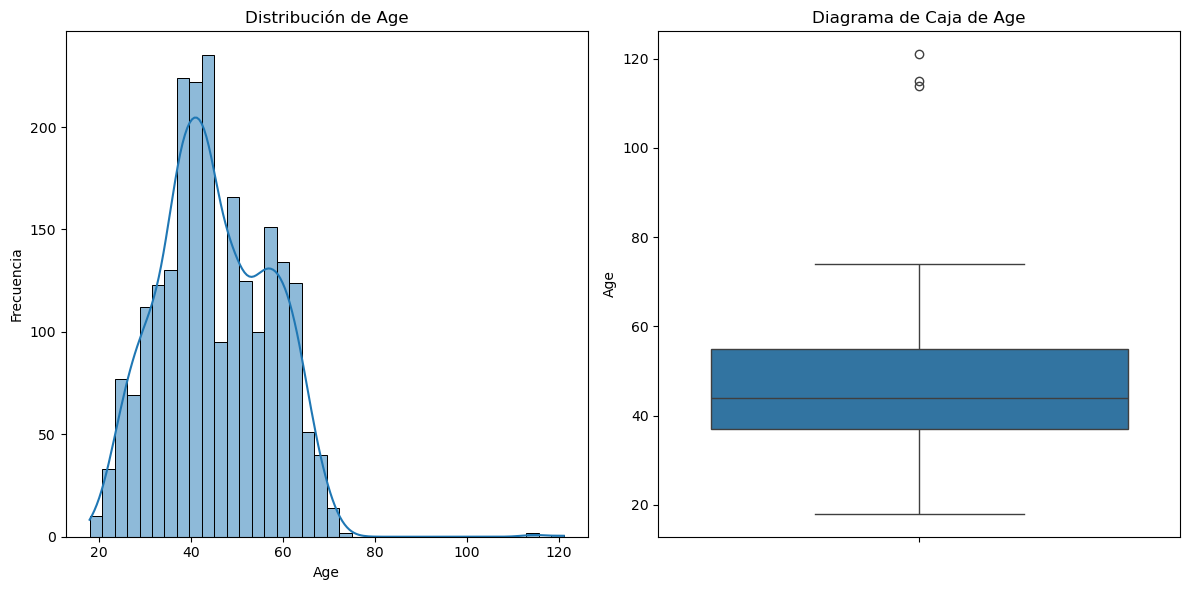

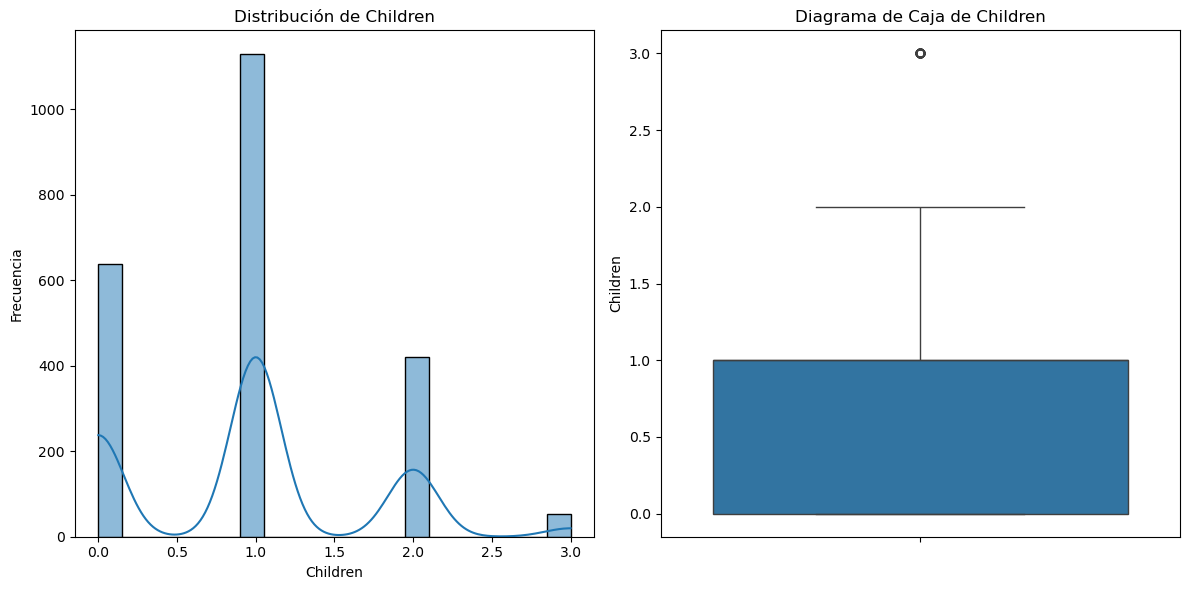

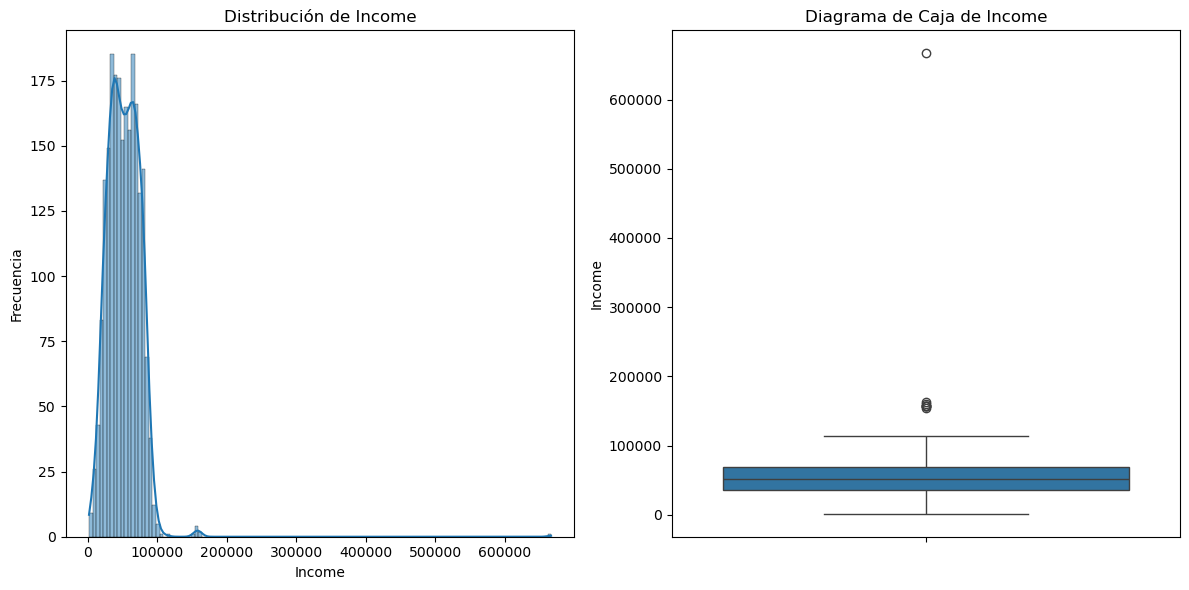

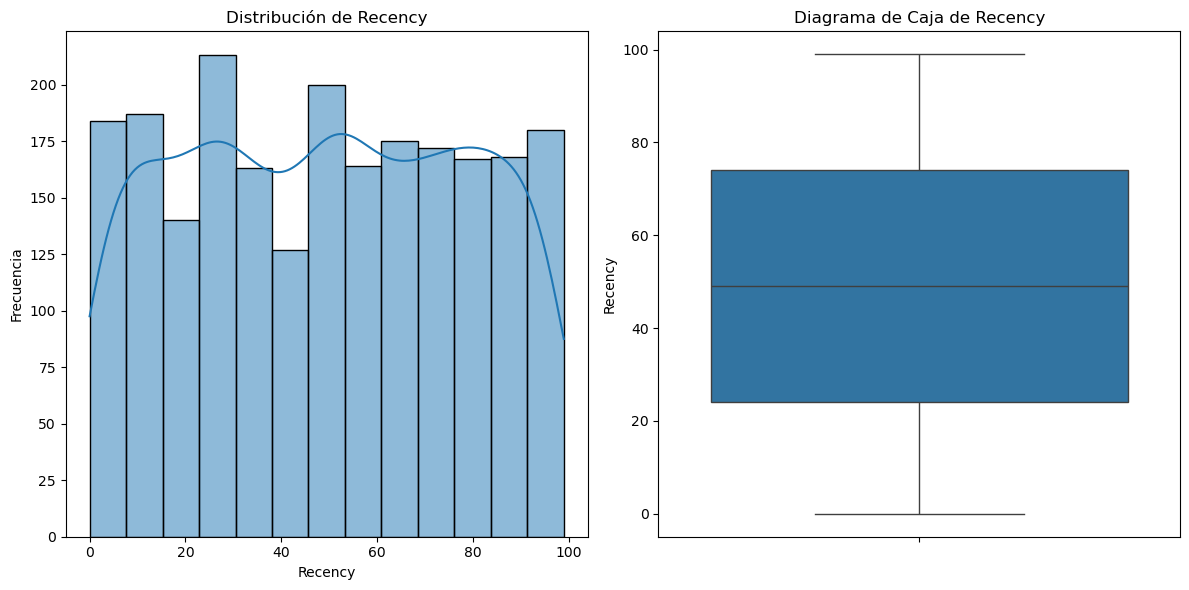

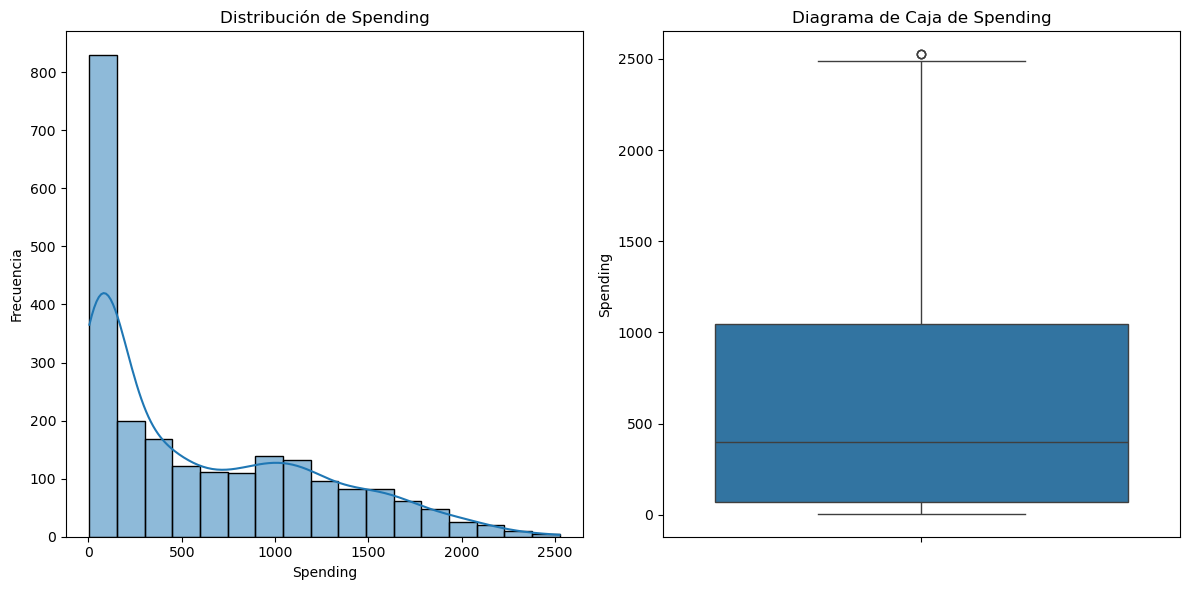

In [618]:
# visualizar Year_Birth, Age, Children, Income, Recency y Spending

# Lista de variables a visualizar
variables = ['Age', 'Children', 'Income', 'Recency', 'Spending']

# Histogramas y diagramas de caja para cada variable
for variable in variables:
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

    # Diagrama de caja
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'Diagrama de Caja de {variable}')
    plt.ylabel(variable)

    plt.tight_layout()
    plt.show()


### Puntos a tener en cuenta en estas visualizaciones
- Aca podemos ver los outliers de age que sobrepasan los 100 anos de edad
- Podemos ver que en Children tenemos mayoriariamente 1 nino por cliente
- Encontramos un outlier en income de mas de 600.000
- En recency vemos que la frecuencia es distribuida de forma equitativa
- En spending vemos que hay un sesgo a la derecha representando que el promedio es menos de 500

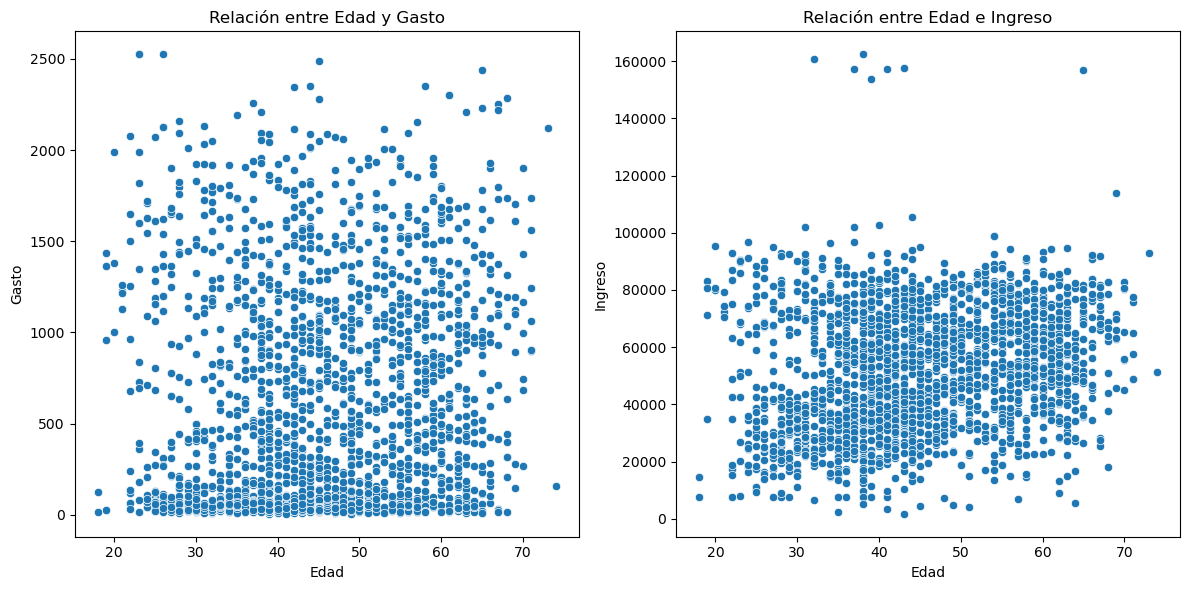

In [619]:
plt.figure(figsize=(12, 6))

# Diagrama de dispersión entre Age y Spending
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Spending', data=df[df['Age'] < 90])
plt.title('Relación entre Edad y Gasto')
plt.xlabel('Edad')
plt.ylabel('Gasto')

# Diagrama de dispersión entre Age e Income
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Income', data=df[(df['Age'] < 90) & (df['Income'] < 600000)])
plt.title('Relación entre Edad e Ingreso')
plt.xlabel('Edad')
plt.ylabel('Ingreso')

plt.tight_layout()
plt.show()

### Aca no pudimos un relacion entre Edad con gasto e ingreso
solo podemos ver que 6 de los ingresos mas elevados estan dentro del rango de edad de los 30 a 45 anos de edad.

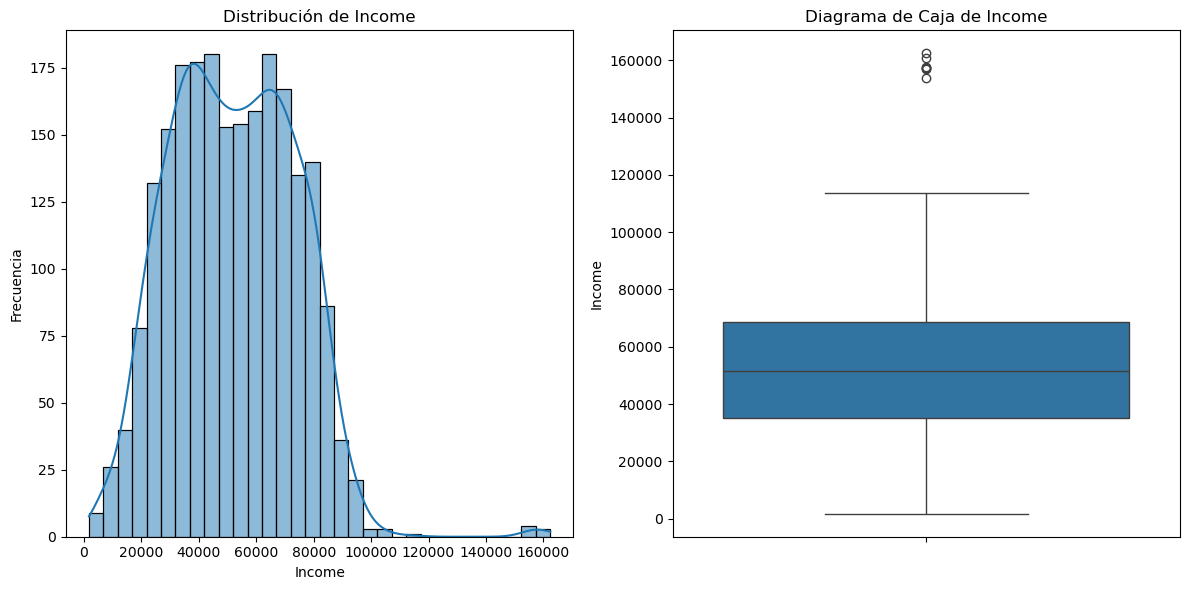

In [620]:
# Analisis de Income
#Eliminar valores atipicos
df_sin_outliers = df[df['Income'] < 600000]
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df_sin_outliers['Income'], kde=True)
plt.title(f'Distribución de Income')
plt.xlabel('Income')
plt.ylabel('Frecuencia')

# Diagrama de caja
plt.subplot(1, 2, 2)
sns.boxplot(y=df_sin_outliers['Income'])
plt.title(f'Diagrama de Caja de Income')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

### Aca ya podemos ver que el income sin el outlier esta levemente sesgado a la derecha y la media ronda los 50000

In [621]:
#Codigo para detectar outliers usando el IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return True for outliers
    return (data < lower_bound) | (data > upper_bound)

In [622]:
#Verificamos los tipos de variables numéricas
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
ID,0.0,0.000000,0.0,11191.0
Year_Birth,3.0,0.133929,1940.0,1996.0
Income,8.0,0.357143,1730.0,113734.0
Kidhome,0.0,0.000000,0.0,2.0
Teenhome,0.0,0.000000,0.0,2.0
Recency,0.0,0.000000,0.0,99.0
Wines,35.0,1.562500,0.0,1224.0
Fruits,227.0,10.133929,0.0,81.0
Meat,175.0,7.812500,0.0,555.0
Fish,223.0,9.955357,0.0,120.0


### Encontramos varias columnas con outliers pero no representativos para lo que representan, pero tendremos en cuenta mas adelante

In [623]:
# drop de id, kidhome,teenhome,recency, acceptedcmp1, acceptedcmp2, acceptedcmp3, acceptedcmp4, acceptedcmp5, response
df.drop(['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

#eliminar duplicados si hubiere
df.drop_duplicates(inplace=True)

# eliminar outliers
# eliminar si age es mayor que 90
df = df[df['Age'] <= 90]
# eliminar income es mayor que 200000
df = df[df['Income'] <= 200000]

#eliminar 24 nulos por representar 1.07% de los datos
df.dropna(inplace=True) 

# Crear el nuevo DataFrame 'cust' con los cambios aplicados
cust = df.copy() 

cust

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,Store,NumWebVisitsMonth,Complain,Recency_Category,Number_Campaigns_Accepted,Accepted,Spending,Children,Has_child,Age
0,1957,Postgraduate,Alone,58138.0,2012-09-04,58,635,88,546,172,...,4,7,0,poco_frecuente,1,1,1617,0,No child,57
1,1954,Postgraduate,Alone,46344.0,2014-03-08,38,11,1,6,2,...,2,5,0,regular,0,0,27,2,Has child,60
2,1965,Postgraduate,In couple,71613.0,2013-08-21,26,426,49,127,111,...,10,4,0,regular,0,0,776,0,No child,49
3,1984,Postgraduate,In couple,26646.0,2014-02-10,26,11,4,20,10,...,4,6,0,regular,0,0,53,1,Has child,30
4,1981,Postgraduate,In couple,58293.0,2014-01-19,94,173,43,118,46,...,6,5,0,ocasional,0,0,422,1,Has child,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Postgraduate,Alone,26816.0,2012-08-17,50,5,1,6,3,...,3,4,0,poco_frecuente,0,0,22,0,No child,28
2235,1967,Postgraduate,In couple,61223.0,2013-06-13,46,709,43,182,42,...,4,5,0,regular,0,0,1341,1,Has child,47
2237,1981,Postgraduate,Alone,56981.0,2014-01-25,91,908,48,217,32,...,13,6,0,ocasional,1,1,1241,0,No child,33
2238,1956,Postgraduate,In couple,69245.0,2014-01-24,8,428,30,214,80,...,10,3,0,recurrente,0,0,843,1,Has child,58


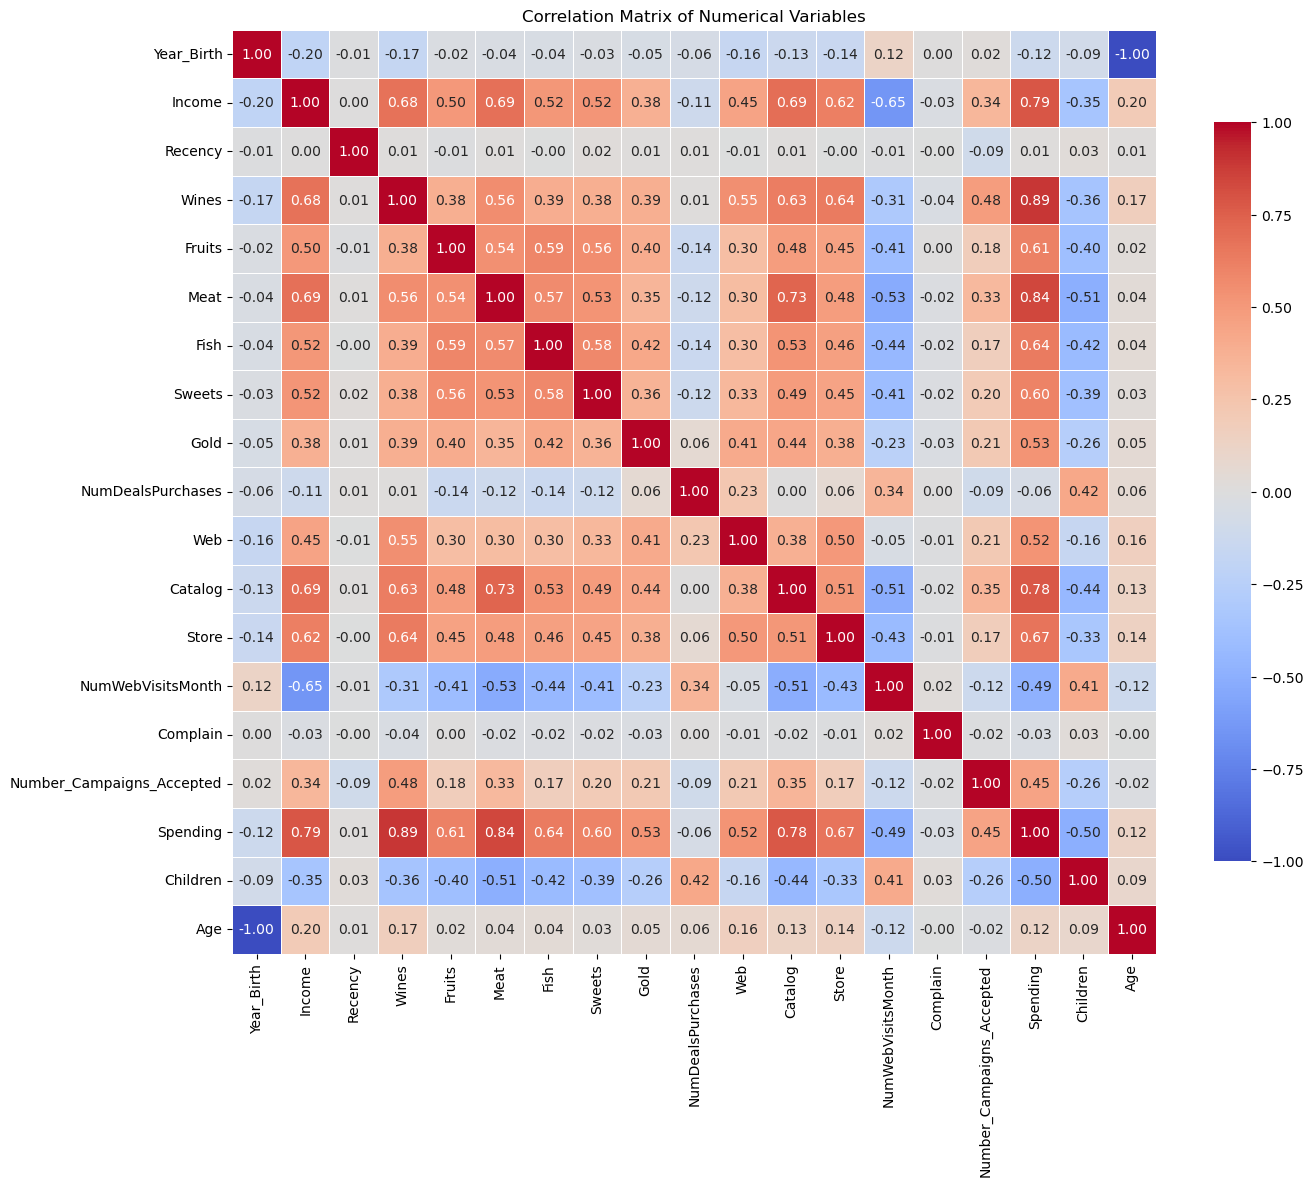

In [624]:
numerical_columns = cust.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = cust[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


### Podemos ver como Spending tiene una alta correlacion con la mayoria de las variables, por eso vamos a ver los resultados con PCA y k-means con poca cantidad de K, para evitar un sobreajuste.

In [625]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year_Birth                 2027 non-null   int64         
 1   Education                  2027 non-null   object        
 2   Marital_Status             2027 non-null   object        
 3   Income                     2027 non-null   float64       
 4   Dt_Customer                2027 non-null   datetime64[ns]
 5   Recency                    2027 non-null   int64         
 6   Wines                      2027 non-null   int64         
 7   Fruits                     2027 non-null   int64         
 8   Meat                       2027 non-null   int64         
 9   Fish                       2027 non-null   int64         
 10  Sweets                     2027 non-null   int64         
 11  Gold                       2027 non-null   int64         
 12  NumDea

### Separamos las columnas a las cuales les aplicamos transformaciones para crear un nuevo dataframe


### 2. Análisis no supervisado:
  - Selecciona un enfoque de análisis no supervisado: K-means o PCA.
    - K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
    - PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.


In [626]:
# Importar librerias para k=means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2, RFE


c:\Users\diego\miniconda3\envs\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\diego\miniconda3\envs\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\diego\miniconda3\envs\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\diego\miniconda3\envs\deep_learning\lib\site-packages\sklearn\clust

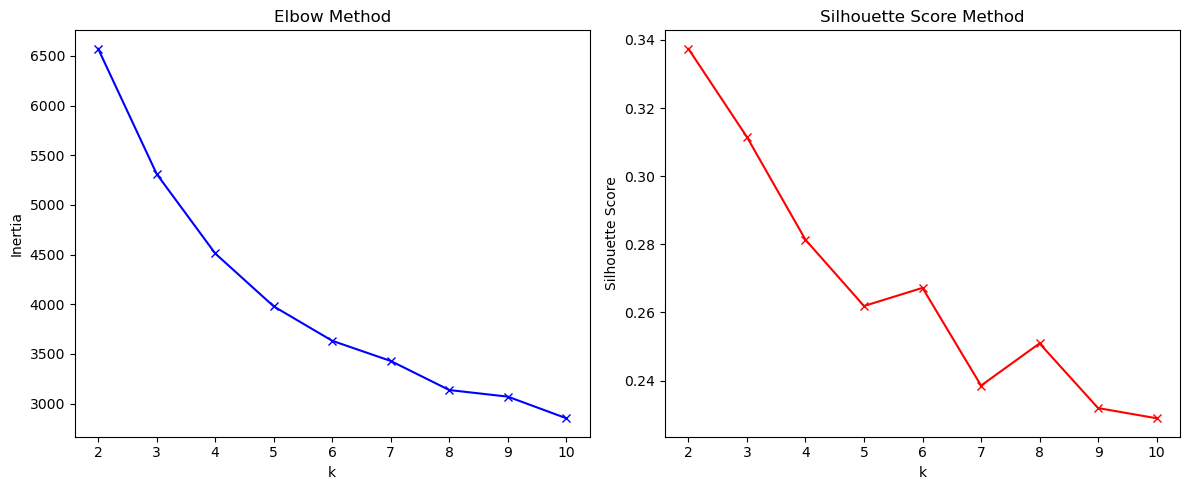

In [627]:
# Escalamos las características del cliente,
# determinamos la cantidad óptima de clústeres mediante los métodos de codo y silueta,
# aplicamos la agrupación en clústeres de KMeans y visualizamos los clústeres.
# Seleccionar características relevantes para la agrupación
features = ['Income', 'Age', 'Spending', 'NumDealsPurchases', 'NumWebVisitsMonth']
X = cust[features]


# Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculamos la inercia y el silhouette score para diferentes valores de k
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Graficamos los resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.tight_layout()
plt.show()


### Se utilizó el método del codo y la silhouette score para determinar la cantidad óptima de clusters, que resultó ser 4.
### Ahora, analizamos los grupos en función de las características demográficas y de compra, y visualizamos con centroides.


c:\Users\diego\miniconda3\envs\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Cluster Analysis:
               Income        Age     Spending  NumDealsPurchases  \
Cluster                                                            
0        76575.202037  45.183362  1334.297114           1.320883   
1        32208.143687  36.978229   114.580552           1.908563   
2        53601.261905  45.623016   695.273810           6.210317   
3        49755.607646  56.032193   388.961771           2.171026   

         NumWebVisitsMonth  
Cluster                     
0                 2.932088  
1                 6.759071  
2                 6.888889  
3                 5.374245  


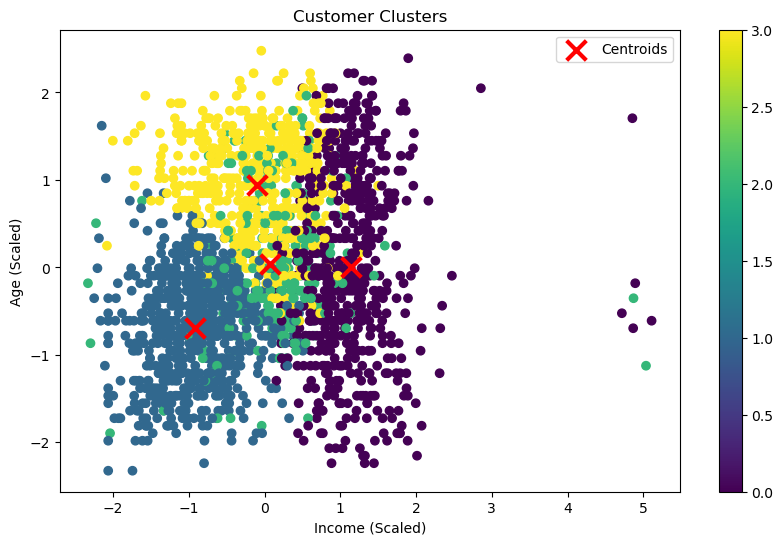

Silhouette Score: 0.28


In [628]:

# Elegimos el valor óptimo de k = 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cust['Cluster'] = kmeans.fit_predict(X_scaled)

# Predecir etiquetas
y_kmeans = kmeans.predict(X_scaled)

# Analisis de los clusters
cluster_analysis = cust.groupby('Cluster')[features].mean()
print("\
Cluster Analysis:")
print(cluster_analysis)

# Visualizamos los clusters (utilizando las dos primeras caracteristicas)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cust['Cluster'], cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidth=3, label='Centroids')
plt.xlabel('Income (Scaled)')
plt.ylabel('Age (Scaled)')
plt.title('Customer Clusters')
plt.colorbar(scatter)
plt.legend()
plt.show()

# Calcular métrica de Silhouette
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")

### Podemos ver que hay agrupaciones pero tenemos un Silhoute Score muy bajo que representa una Clusterizacion de mala calidad, con Clusters no muy bien separados. Vemos como el cluster 2 esta muy disperso.

In [629]:
# Detallamos el analisis de los clusters por cada variable de interes
cluster_profiles = cust.groupby('Cluster').agg({
    'Income': 'mean',
    'Age': 'mean',
    'Spending': 'mean',
    'NumDealsPurchases': 'mean',
    'NumWebVisitsMonth': 'mean',
    'Wines': 'mean',
    'Meat': 'mean',
    'Fish': 'mean',
    'Education': lambda x: x.mode()[0],
    'Marital_Status': lambda x: x.mode()[0],
    'Has_child': lambda x: x.mode()[0]
}).round(2)

print("\
Perfiles de clúster detallados:")
print(cluster_profiles)

Perfiles de clúster detallados:
           Income    Age  Spending  NumDealsPurchases  NumWebVisitsMonth  \
Cluster                                                                    
0        76575.20  45.18   1334.30               1.32               2.93   
1        32208.14  36.98    114.58               1.91               6.76   
2        53601.26  45.62    695.27               6.21               6.89   
3        49755.61  56.03    388.96               2.17               5.37   

          Wines    Meat   Fish     Education Marital_Status  Has_child  
Cluster                                                                 
0        627.46  418.83  88.95  Postgraduate      In couple   No child  
1         46.85   26.72   9.34  Postgraduate      In couple  Has child  
2        411.79  149.92  29.07  Postgraduate      In couple  Has child  
3        229.34   75.80  19.86  Postgraduate      In couple  Has child  


### Analizamos los clusters, estos son los distintos segmentos de clientes:

**Grupo 0: "Conocedores adinerados"**

- Ingresos más altos ($76,500)
- Gastadores de alto valor ($1,334 promedio)
- Grandes consumidores de vino
- Principalmente parejas sin hijos
- Visitas web menos frecuentes

**Grupo 1: "Jóvenes conscientes del presupuesto"**

- Grupo más joven (37 años)
- Ingresos más bajos ($32,200)
- Gasto mínimo ($114 promedio)
- Tiene hijos
- Visitantes frecuentes en línea

**Grupo 2: "Cazadores de ofertas"**

- Ingresos medios ($53,600)
- Mayor número de ofertas compradas
- Gasto moderado a alto
- Visitantes web más frecuentes
- Tiene hijos

**Grupo 3: "Gastadores moderados mayores"**

- Grupo de mayor edad (56 años)
- Ingresos y gastos moderados
- Tiene hijos
- Interacción web promedio


Número de componentes que capturan una variación del 90 %: 4


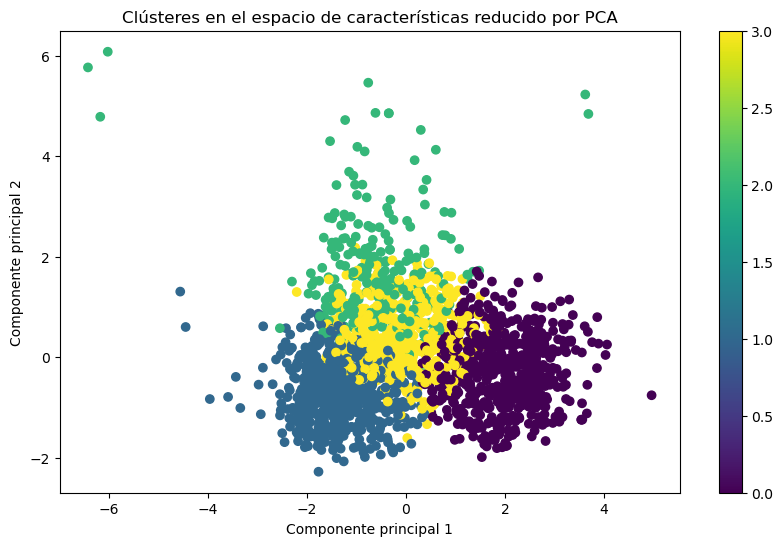

In [630]:
from sklearn.decomposition import PCA


# Aplicar PCA para capturar el 90% de la varianza
pca = PCA(n_components=0.90, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Verificamos el número de componentes seleccionados
print("Número de componentes que capturan una variación del 90 %:", pca.n_components_)

# Visualizar los clústeres en el espacio reducido por PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cust['Cluster'], cmap='viridis')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clústeres en el espacio de características reducido por PCA')
plt.colorbar(scatter)
plt.show()

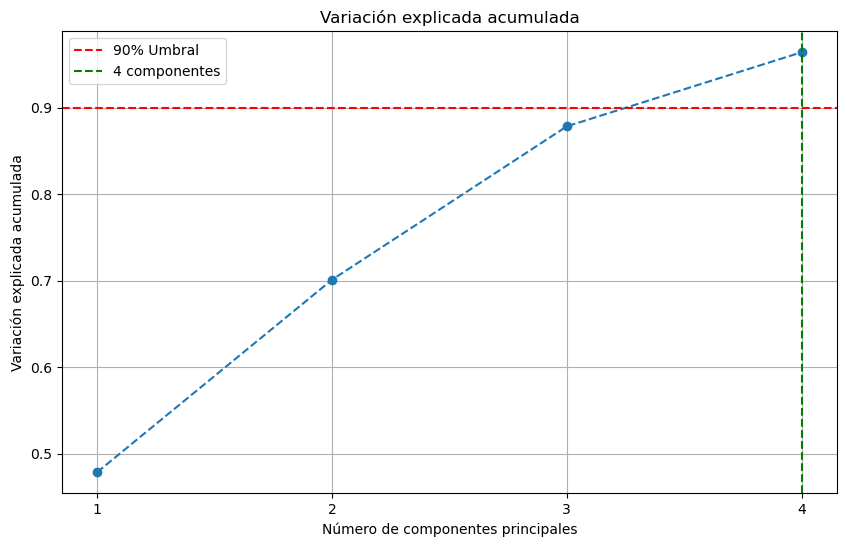

Variación explicada acumulada:
Componente 1: 47.85%
Componente 2: 70.11%
Componente 3: 87.85%
Componente 4: 96.43%


In [631]:
# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 5, 1))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")

### El análisis de componentes principales redujo los datos a 4 componentes y captó el 90 % de la varianza. A continuación, se muestra la visualización de los grupos de clientes en el espacio de características reducido por el análisis de componentes principales.


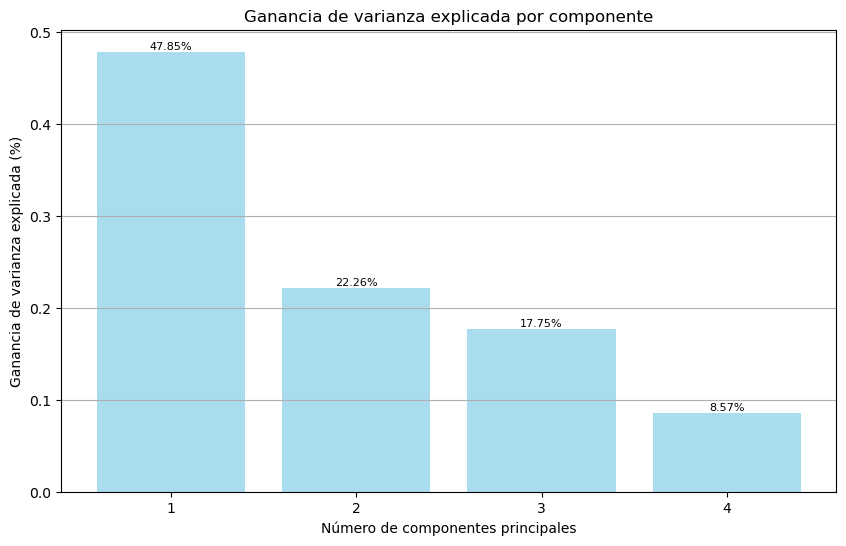

Ganancia de varianza explicada por componente:
Componente 1: 47.85%
Componente 2: 22.26%
Componente 3: 17.75%
Componente 4: 8.57%


In [632]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 5), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 5, 1))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
            ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")



### 3. Modelado con MLP:
  - Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
  - Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
  - Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

#Preparar características y target
# Predecir el comportamiento de gasto alto y bajo
spending_median = cust['Spending'].median()
y = (cust['Spending'] > spending_median).astype(int)
X = cust[['Income', 'Age', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Wines', 'Meat', 'Fish']]


# dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# construir el modelo con regularizador l2
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

# compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.002),
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Definir early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo con early stopping
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50


c:\Users\diego\miniconda3\envs\deep_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8269 - loss: 0.9593 - val_accuracy: 0.9415 - val_loss: 0.5625
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9469 - loss: 0.5346 - val_accuracy: 0.9723 - val_loss: 0.3723
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9432 - loss: 0.3904 - val_accuracy: 0.9815 - val_loss: 0.2713
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9580 - loss: 0.2948 - val_accuracy: 0.9877 - val_loss: 0.2127
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9449 - loss: 0.2597 - val_accuracy: 0.9785 - val_loss: 0.1812
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9595 - loss: 0.2169 - val_accuracy: 0.9785 - val_loss: 0.1649
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9604 - loss: 0.1955 - val_accuracy: 0.9754 - val_loss: 0.1515
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9572 - loss: 0.1840 - val_accuracy: 0.9908 - val_loss: 0.1292
Ep

### Aplicamos varias tecnicas para manejar el sobreajuste como regularizador L2, el Dropout en 0.25 y un early_stopping basado en val_loss si no mejora en 3 epocas porque tenia un sobreajuste al comienzo y tuve que optimizar de varias maneras.


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Mejor Epoch: 27
Validation Loss: 0.1050
Validation Accuracy: 0.9785
Validation Precision: 0.9641
Validation Recall: 0.9938
Validation F1-score: 0.9787
Validation AUC: 0.9982


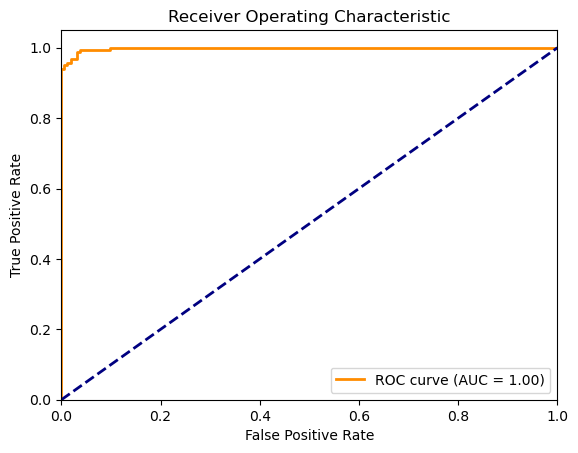

In [634]:
# Obtener el mejor epoch según Early Stopping
best_epoch = early_stopping.best_epoch

# Evaluar el modelo en el conjunto de validación (usando el mejor epoch)
# Esto es CRUCIAL para obtener las métricas correctas.
#Preparamos los datos de validacion
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train)

val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0) # X_val_scaled y y_val deben existir.


# Predecir las probabilidades para el conjunto de validación
y_val_probs = model.predict(X_val_scaled)

# Calcular las métricas
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

y_val_pred = (y_val_probs > 0.5).astype(int)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)

# Imprimir las métricas
print(f"Mejor Epoch: {best_epoch}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")
print(f"Validation AUC: {roc_auc:.4f}")

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 4. Evaluación del modelo:
  - Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
  - Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


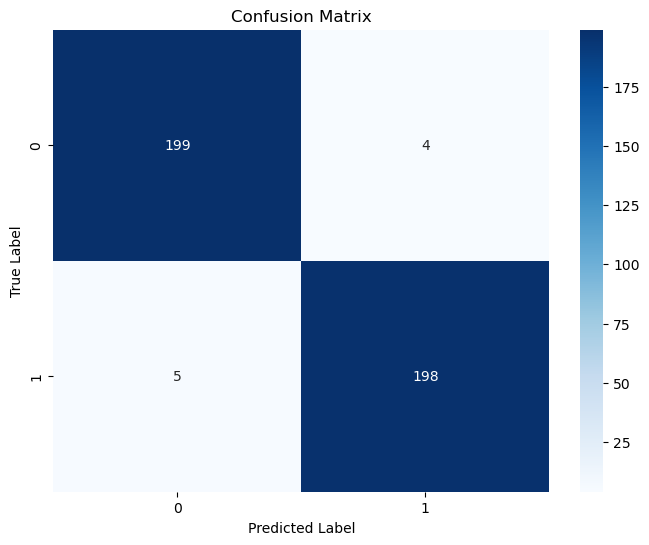

Test Accuracy: 97.78 %
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       203
           1       0.98      0.98      0.98       203

    accuracy                           0.98       406
   macro avg       0.98      0.98      0.98       406
weighted avg       0.98      0.98      0.98       406



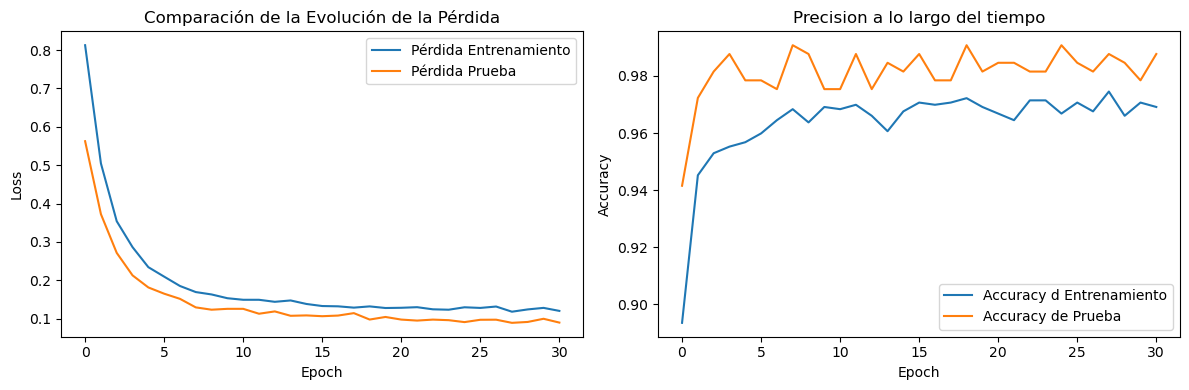

In [635]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Plot Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\
Test Accuracy:", round(test_accuracy * 100, 2), "%")
print("\
Classification Report:")
print(classification_report(y_test, y_pred))

# Plot historial de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Prueba')
plt.title('Comparación de la Evolución de la Pérdida')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy d Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de Prueba')
plt.title('Precision a lo largo del tiempo')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Las curvas de aprendizaje muestran un comportamiento típico durante el entrenamiento del modelo. En el gráfico de Pérdida, se observa una rápida disminución tanto en el conjunto de entrenamiento como en el de prueba durante las primeras épocas, lo cual indica que el modelo está aprendiendo y ajustándose a los datos. Posteriormente, la pérdida en ambos conjuntos se estabiliza, sugiriendo que el modelo ha convergido a un mínimo. Es importante destacar que la pérdida en el conjunto de prueba se mantiene ligeramente por encima de la pérdida en el conjunto de entrenamiento, lo cual es normal y esperable.

En el gráfico de Precisión, se observa un aumento rápido en ambos conjuntos durante las primeras épocas, en concordancia con la disminución de la pérdida. La precisión en el conjunto de entrenamiento alcanza valores cercanos a 1, mientras que la precisión en el conjunto de prueba se estabiliza en un valor ligeramente inferior, alrededor de 97.77%. La cercanía entre las curvas de precisión en ambos conjuntos, junto con la estabilización de la pérdida, refuerza la conclusión de que el modelo generaliza bien a datos no vistos y no presenta signos de sobreajuste significativo.

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


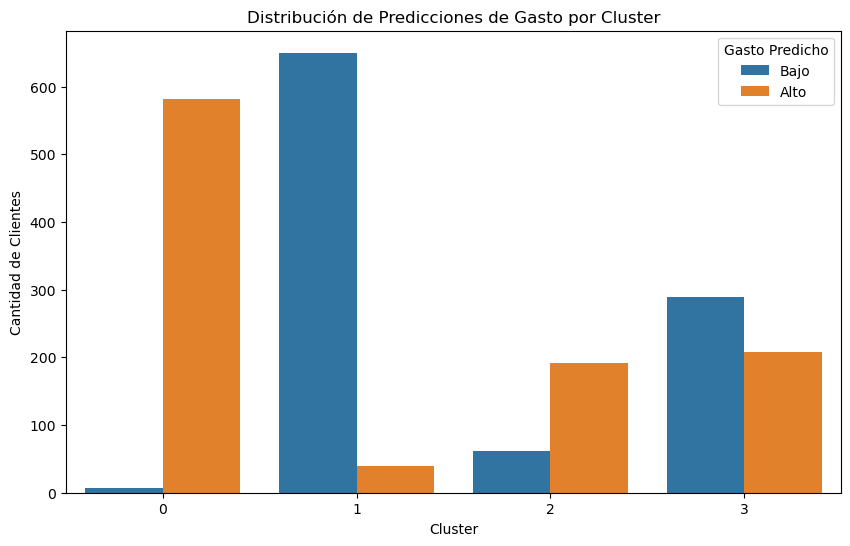

Cluster 3: 41.85% de clientes predichos con alto gasto
Cluster 0: 98.81% de clientes predichos con alto gasto
Cluster 1: 5.66% de clientes predichos con alto gasto
Cluster 2: 75.79% de clientes predichos con alto gasto


In [636]:
# Predecir las clases para todo el conjunto de datos (escalado)
X_scaled = scaler.transform(X) #Escalar todo el dataset
y_pred_all = (model.predict(X_scaled) > 0.5).astype(int)
cust['Predicted_Spending'] = y_pred_all

# Analizar la distribución de las predicciones dentro de cada cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Predicted_Spending', data=cust)
plt.title('Distribución de Predicciones de Gasto por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Gasto Predicho', labels=['Bajo', 'Alto'])
plt.show()

# Calcular y mostrar los porcentajes
for cluster in cust['Cluster'].unique():
    cluster_data = cust[cust['Cluster'] == cluster]
    total_cluster = len(cluster_data)
    high_spending = cluster_data['Predicted_Spending'].sum()
    percentage = (high_spending / total_cluster) * 100 if total_cluster > 0 else 0
    print(f"Cluster {cluster}: {percentage:.2f}% de clientes predichos con alto gasto")



### 5. Discusión y análisis:
  - Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?
  - Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?


**Análisis de la Distribución de Predicciones por Cluster:**

El gráfico "Distribución de Predicciones de Gasto por Cluster" muestra la cantidad de clientes en cada cluster que fueron predichos como "Alto Gasto" y "Bajo Gasto" por el modelo MLP. Analizando el gráfico, podemos observar lo siguiente:

- Cluster 0 (Ingresos muy altos, edad media, gasto alto, pocas compras con descuento, pocas visitas web): La gran mayoría de los clientes en este cluster son predichos como "Alto Gasto". Esto coincide con la descripción del cluster, que indica que son clientes con un gasto históricamente alto.
- Cluster 1 (Ingresos bajos, jóvenes, gasto muy bajo, pocas compras con descuento, muchas visitas web): La gran mayoría de los clientes en este cluster son predichos como "Bajo Gasto". Esto también es consistente con la descripción del cluster.
- Cluster 2 (Ingresos medios, edad media, gasto medio, muchas compras con descuento, muchas visitas web): En este cluster, la proporción de clientes predichos como "Alto Gasto" es mayor que la de "Bajo Gasto", aunque la diferencia no es tan marcada como en los clusters 0 y 1. Esto sugiere que aunque tienen un gasto medio, las compras con descuento y las visitas web frecuentes podrían ser indicadores de un potencial de gasto mayor.
- Cluster 3 (Ingresos medios, mayores, gasto bajo, pocas compras con descuento, visitas web moderadas): En este cluster, la cantidad de clientes predichos como "Bajo Gasto" es mayor que la de "Alto Gasto", aunque la proporción de "Alto Gasto" es relativamente significativa. Esto podría indicar que dentro de este grupo de clientes mayores con gasto bajo, hay un subsegmento con un mayor potencial de gasto.
Relación entre K-Means y MLP:

Los resultados muestran una fuerte correlación entre los clusters identificados por K-Means y las predicciones del MLP. Los clusters que se caracterizan por un gasto históricamente alto (Cluster 0) son consistentemente predichos como "Alto Gasto" por el MLP. De manera similar, los clusters con gasto históricamente bajo (Cluster 1) son predichos como "Bajo Gasto".

Sin embargo, los clusters 2 y 3 muestran una mayor mezcla en las predicciones, lo que sugiere que las características utilizadas por el K-Means (ingresos, edad, gasto, compras con descuento y visitas web) no son suficientes para predecir con total precisión el comportamiento de gasto en estos grupos.

**Posibles Mejoras y Próximos Pasos:**

Incorporar el Cluster como Característica en el MLP: Como mencioné anteriormente, añadir la pertenencia al cluster como una nueva variable categórica en el modelo MLP podría mejorar su rendimiento, especialmente para los clusters 2 y 3. Esto le daría al modelo información adicional sobre la segmentación de clientes.

- **Explorar otras características:** Podrías considerar la posibilidad de añadir otras variables al modelo, como el tipo de productos comprados (vinos, carne, pescado), el estado civil, si tienen hijos, etc. Esto podría ayudar a refinar las predicciones, especialmente en los clusters donde la separación entre "Alto Gasto" y "Bajo Gasto" no es tan clara.

- **Ajuste de Hiperparámetros del MLP:** Aunque no hay sobreajuste significativo, podrías intentar ajustar los hiperparámetros del modelo (número de neuronas en las capas, tasa de dropout, tasa de aprendizaje, etc.) para optimizar aún más su rendimiento.

- **Revisar el K-Means:** Dado el bajo Silhouette Score (0.28), podrías considerar:

- Probar con un número diferente de clusters (k).
- Usar un método de clustering diferente.
- Aplicar técnicas de reducción de dimensionalidad (como PCA) antes del K-Means para mejorar la separación de los clusters.

**Conclusión:**

El análisis muestra una buena correlación entre los resultados del K-Means y el MLP. Sin embargo, hay margen de mejora, especialmente en la predicción del comportamiento de gasto en algunos segmentos de clientes. Incorporar la información del cluster en el MLP y explorar otras características podrían ser buenos pasos para mejorar el modelo.


### 6. Entrega final:
  - Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.